In [ ]:
!pip install keras

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

Using TensorFlow backend.


In [ ]:
img_width,img_height=224,224
train_data_dir="/content/drive/My Drive/Dance/Dataset/dance"
validation_data_dir="/content/drive/My Drive/Dance/Dataset/dance"
batch_size=32

datagen=ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      validation_split=0.3
    
)

In [ ]:
train_generator=datagen.flow_from_directory(
      directory=train_data_dir,
      target_size=(img_width,img_height),
      batch_size=batch_size,
      subset='training',
      class_mode='categorical'
)

Found 258 images belonging to 8 classes.


In [ ]:
validation_generator=datagen.flow_from_directory(
        directory=validation_data_dir,
         target_size=(img_width,img_height),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical'

)

Found 106 images belonging to 8 classes.


In [10]:
sample_training_images, _ = next(train_generator)

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

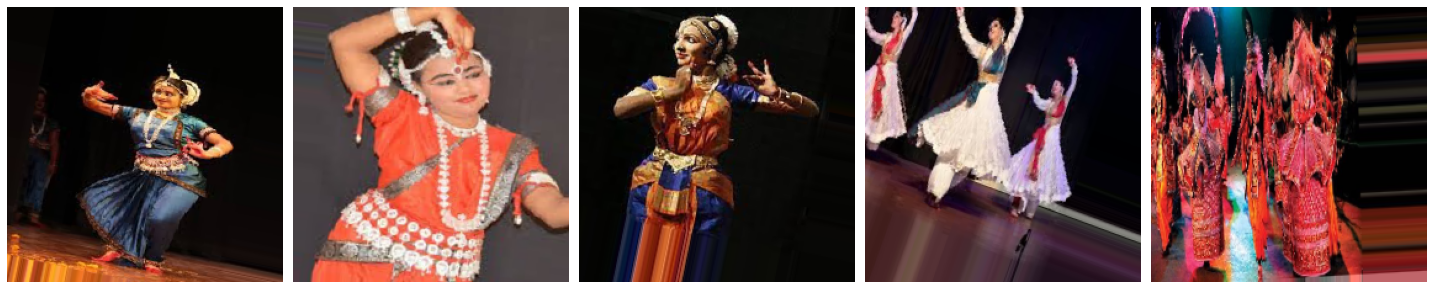

In [12]:
plotImages(sample_training_images[:5])

In [22]:
IMAGE_RES=224
import tensorflow as tf

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,input_shape=(IMAGE_RES,IMAGE_RES,3))

feature_extractor.trainable=False

model = tf.keras.Sequential([
    feature_extractor,

    tf.keras.layers.Dense(8,activation='softmax')]
         
)


In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 10248     
Total params: 2,268,232
Trainable params: 10,248
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
EPOCHS=100

history=model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/100
9/9 [==============================] - 160s 18s/step - loss: 2.4306 - accuracy: 0.1240 - val_loss: 2.1593 - val_accuracy: 0.2547
Epoch 2/100
9/9 [==============================] - 7s 797ms/step - loss: 1.6994 - accuracy: 0.3721 - val_loss: 1.6722 - val_accuracy: 0.4340
Epoch 4/100
9/9 [==============================] - 7s 805ms/step - loss: 1.4460 - accuracy: 0.4884 - val_loss: 1.3384 - val_accuracy: 0.6038
Epoch 5/100
9/9 [==============================] - 7s 790ms/step - loss: 1.2094 - accuracy: 0.5814 - val_loss: 1.2484 - val_accuracy: 0.5943
Epoch 6/100
9/9 [==============================] - 7s 775ms/step - loss: 1.1203 - accuracy: 0.6550 - val_loss: 1.2268 - val_accuracy: 0.5755
Epoch 7/100
9/9 [==============================] - 7s 762ms/step - loss: 1.0238 - accuracy: 0.6667 - val_loss: 1.1212 - val_accuracy: 0.6604
Epoch 8/100
9/9 [==============================] - 7s 806ms/step - loss: 0.9902 - accuracy: 0.6899 - val_loss: 1.1015 - val_accuracy: 0.6321
Epoch 9/100
9

In [28]:
classes = ['bharatanatyam', 'kathak','kathakali','kuchipudi', 'manipuri' ,'mohiniyattam','odissi','sattriya' ]

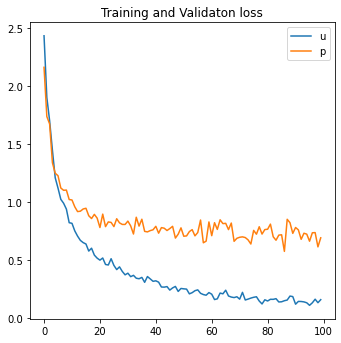

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)


plt.figure(figsize=(12,12))
plt.subplot(1,2,1)

plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.legend('lower right')
plt.title('Training and Validaton Accuracy')

plt.subplot(2,2,1)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend('upper right')
plt.title('Training and Validaton loss')

plt.show()

In [30]:
path="/content/drive/My Drive/Dance/Dataset/test"

In [32]:
m=dict()
IMAGE_SHAPE=(224,224)
import PIL.Image as Image
import os

for files in os.listdir(path):
    image=os.path.join(path,files)
    image = Image.open(image).resize(IMAGE_SHAPE)
    image = np.array(image)/255.0
    result = model.predict(image[np.newaxis, ...])
    predicted_class = np.argmax(result[0], axis=-1)
    m[files]=classes[predicted_class]

In [33]:
import pandas as pd
test_csv=pd.read_csv("/content/drive/My Drive/Dance/Dataset/test.csv")
test_csv.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [34]:
target=[]
image=[]
for i in range(len(test_csv)):
    image.append(test_csv['Image'][i])
    target.append(m[test_csv['Image'][i]])

In [35]:
df={'Image':image,'target':target}
df=pd.DataFrame(data=df)
df.to_csv('final_results.csv')
print(df)

       Image     target
0    508.jpg     kathak
1    246.jpg   manipuri
2    473.jpg  kuchipudi
3    485.jpg     odissi
4    128.jpg  kuchipudi
..       ...        ...
151  366.jpg   sattriya
152  226.jpg   sattriya
153   35.jpg     kathak
154  458.jpg     odissi
155  358.jpg   sattriya

[156 rows x 2 columns]


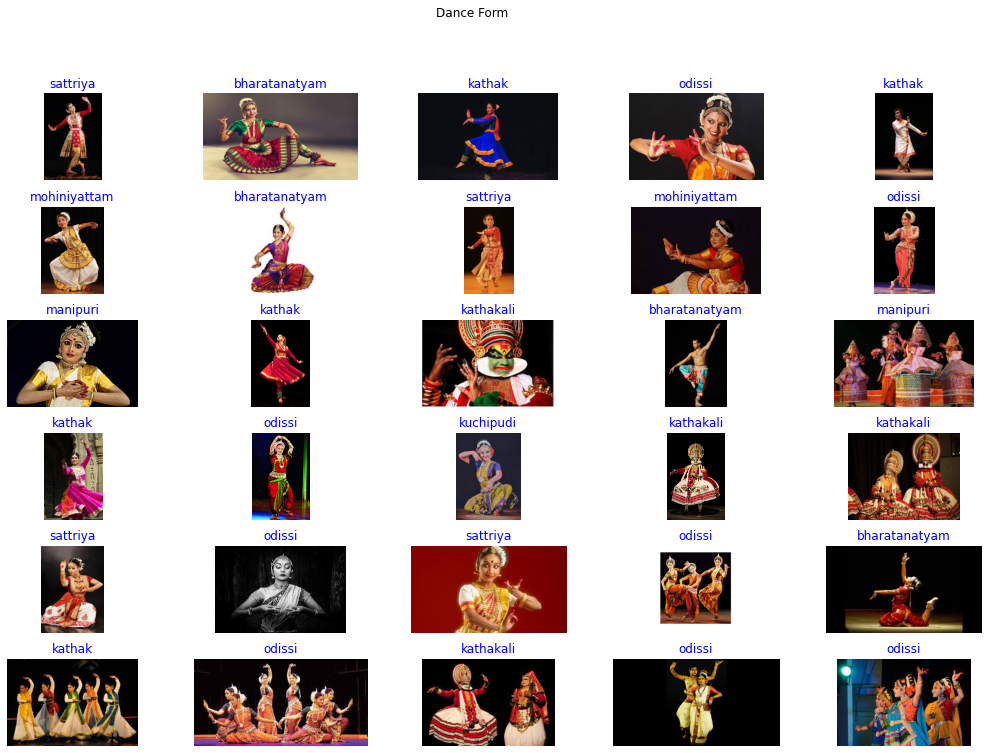

In [50]:
plt.figure(figsize=(18,12))
i=0
for img in os.listdir(path):
  plt.subplot(6,5,i+1)
  plt.subplots_adjust(hspace = 0.3)
  image=plt.imread(path + '/' + img)
  plt.imshow(image)
  plt.title(m[img], color='blue')
  plt.axis('off')
  i+=1

  if(i==30):
    break

_ = plt.suptitle("Dance Form")